### Authors: Prof. Dr. Soumi Ray, Ravi Teja Kothuru and Abhay Srivastav

### Acknowledgements:
I would like to thank my team mates Prof. Dr. Soumi Ray and Abhay Srivastav for their guidance and support throughout this project.

**Title of the Project:** Comparative Analysis of Image-Based and Feature-Based Approaches for Pneumonia Detection in Chest X-rays

**Description of the Project:** This project focuses on detecting pneumonia from chest X-ray images using Advanced Machine Learning and Deep Learning techniques (Rajpurkar et al., 2017; Wang et al., 2017). By leveraging a comprehensive dataset, including annotated images of pneumonia and normal cases, we aim to develop and compare image-based and feature-based approaches. Our goal is to identify the most effective method for accurate and interpretable pneumonia detection, contributing to improved patient outcomes through early diagnosis and treatment. This model will classify patients based on their chest X-ray images as either having pneumonia (1) or not having pneumonia (0).

**Objectives of the Project:** 

- **Image Analysis:** Develop and evaluate deep learning models to classify chest X-rays directly. This approach leverages deep learning models, particularly Convolutional Neural Networks (CNNs), to perform end-to-end image classification. The models directly process raw chest X-ray images to classify them as normal or pneumonia.

- **Feature Analysis:** Extract meaningful features from the images and use them to train and evaluate traditional machine learning models. In this approach, we first extract features from the chest X-ray images. These features are then used as inputs for traditional machine learning algorithms. The process includes steps such as feature extraction, selection, and transformation, followed by the application of machine learning techniques like Support Vector Machines (SVM), Random Forests.

**Name of the Dataset:** The dataset used in this project is the Chest X-ray dataset considered from the Research paper named **Labeled Optical Coherence Tomography (OCT) and Chest X-Ray Images for Classification**.

**Description of the Dataset:** The Diabetes Health Indicators Dataset contains healthcare statistics and lifestyle survey information about people in general along with their diagnosis of diabetes. The 35 features consist of some demographics, lab test results, and answers to survey questions for each patient. The target variable for classification is whether a patient has diabetes, is pre-diabetic, or healthy.

**Dataset Source:** 

- https://data.mendeley.com/datasets/rscbjbr9sj/2

**Type of the Dataset:**

- X-ray Images

**Description of Dataset:** 
The considered dataset has the following information for better reference:
- Separate folders to train and validate/test the model.
- Enough number of Chest X-ray images to train the model to detect and diagnose Pneumonia.
- The target variable for classification is whether patient has pneumonia or not.

**Goal of the Project using this Dataset:**
The goal of this project is to conduct a comprehensive comparative analysis of image-based and feature-based approaches for pneumonia detection using chest X-ray images. By evaluating the performance, robustness, and interpretability of deep learning and traditional machine learning models, we aim to identify the most effective method for accurately classifying chest X-rays as normal or pneumonia. This comparison will provide valuable insights into the strengths and limitations of each approach, ultimately contributing to improved detection and diagnosis of pneumonia, which can enhance patient outcomes and survival rates.

**Why did we choose this dataset?**
We selected this dataset based on several factors. For more detailed information, please refer to the following:
- The dataset is extensive, providing a large number of images suitable for evaluating and training deep learning models.
- It aligns well with the project's objectives by offering a challenging and realistic scenario for developing an image classification model using deep learning, specifically for Chest X-ray images.
- The dataset is annotated with images of two different diseases, enabling the development of a binary-class classification model.
- It is publicly available, facilitating easy access for research and development purposes.

**Size of dataset:**
- Total images size = 1.27 GB
- Dataset has 2 folders:
  -  **Train:**
        -  Normal (without Pneumonia) = 1349 images
        -  Pneumonia = 3883 images
  -  **Test:**
        -  Normal (without Pneumonia) = 234 images
        -  Pneumonia = 390 images
    
**Expected Behaviors and Problem Handling:**
- Classify Chest X-ray images with high accuracy.
- Handle variations in image quality, resolution, and orientation.
- Be robust to noise and artifacts in the images.
- Provide interpretable results.

**Issues to focus on:**
- Improving model interpretability and explainability.
- Optimizing model performance on a held-out test set.
- Following AI Ethics and Data Safety practices.

# Import all the required files and libraries

In [1]:
import pandas as pd
import matplotlib as plot
from pycaret.classification import *
import ssl
import time

# Disable SSL certificate verification
ssl._create_default_https_context = ssl._create_unverified_context


# Automatically reload imported modules when their source code changes
%load_ext autoreload
%reload_ext autoreload
%autoreload 2

# Import python files from local to use the corresponding function
from extracted_features_classification import ExtractedFeaturesClassification
from pneumonia_detector_constants import pneumonia_detector_constants as pdconst

# Analyze First Order Features and Classify

## Create an object of the ExtractedFeaturesClassification class

In [2]:
efc = ExtractedFeaturesClassification()

## Read excel file into Dataframe

In [3]:
xls_file_name = pdconst["image_first_order_features_xls_file_name"]
excel_sheet_names = pdconst["excel_sheet_names"]

In [4]:
df_train_nrm = efc.load_excel_file_into_dataframe(xls_file_name, excel_sheet_names[0])
df_train_pneu = efc.load_excel_file_into_dataframe(xls_file_name, excel_sheet_names[1])
df_test_nrm = efc.load_excel_file_into_dataframe(xls_file_name, excel_sheet_names[2])
df_test_pneu = efc.load_excel_file_into_dataframe(xls_file_name, excel_sheet_names[3])

## Add Target Column to all Dataframes

In [5]:
df_train_nrm, df_train_pneu, df_test_nrm, df_test_pneu = efc.add_target_column_to_dataframes(df_train_nrm, 
                                                                                             df_train_pneu, 
                                                                                             df_test_nrm, 
                                                                                             df_test_pneu)

## Concatenate Dataframes and form train and test dataframes

In [6]:
df_train = efc.concatenate_dataframes(df_train_nrm, df_train_pneu)
df_test = efc.concatenate_dataframes(df_test_nrm, df_test_pneu)

## Check Missing Values for safer side

In [7]:
missing_values_in_train_df = efc.check_missing_values_of_dataframe(df_train)

missing_values_in_test_df = efc.check_missing_values_of_dataframe(df_test)

print(f"Missing values in Train dataframe:\n{missing_values_in_train_df}")
print(f"\n\nMissing values in Test dataframe:\n{missing_values_in_test_df}")

Missing values in Train dataframe:
Image Filename          0
Mean                    0
Median                  0
Standard Deviation      0
Variance                0
Skewness                0
Kurtosis                0
Range                   0
Entropy                 0
Energy                  0
Uniformity              0
RMS                     0
Max_Pixel_Intensity     0
Min_Pixel_Intensity     0
Median_Abs_Deviation    0
Mean_Abs_Deviation      0
IQR                     0
Pneumonia               0
dtype: int64


Missing values in Test dataframe:
Image Filename          0
Mean                    0
Median                  0
Standard Deviation      0
Variance                0
Skewness                0
Kurtosis                0
Range                   0
Entropy                 0
Energy                  0
Uniformity              0
RMS                     0
Max_Pixel_Intensity     0
Min_Pixel_Intensity     0
Median_Abs_Deviation    0
Mean_Abs_Deviation      0
IQR                     0
Pneumo

## Check Duplicates for safer side

In [8]:
duplicates_in_train_df = efc.check_duplicates_of_dataframe(df_train)

duplicates_in_test_df = efc.check_duplicates_of_dataframe(df_test)

print(f"Duplicates in Train dataframe: {duplicates_in_train_df}")
print(f"\nDuplicates in Test dataframe: {duplicates_in_test_df}")

Duplicates in Train dataframe: 0

Duplicates in Test dataframe: 0


## Plot Violin plots and Histograms with KDE for all the First Order features in both test and train dataframes

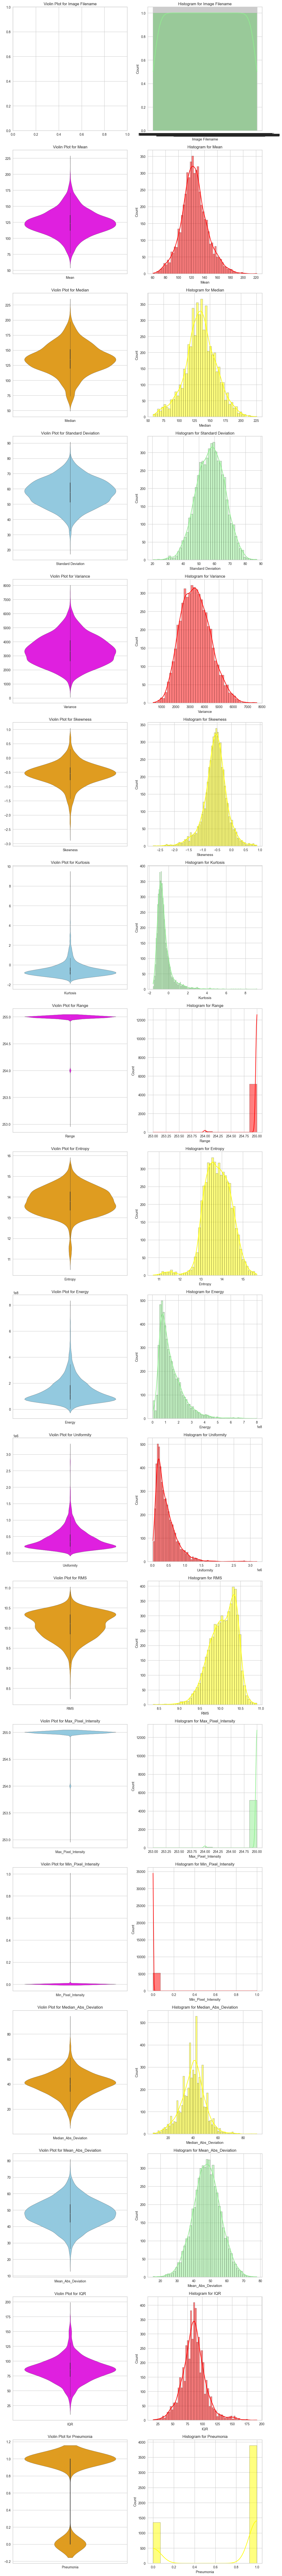

In [9]:
efc.plots_for_all_features(df_train, df_train.columns.tolist())

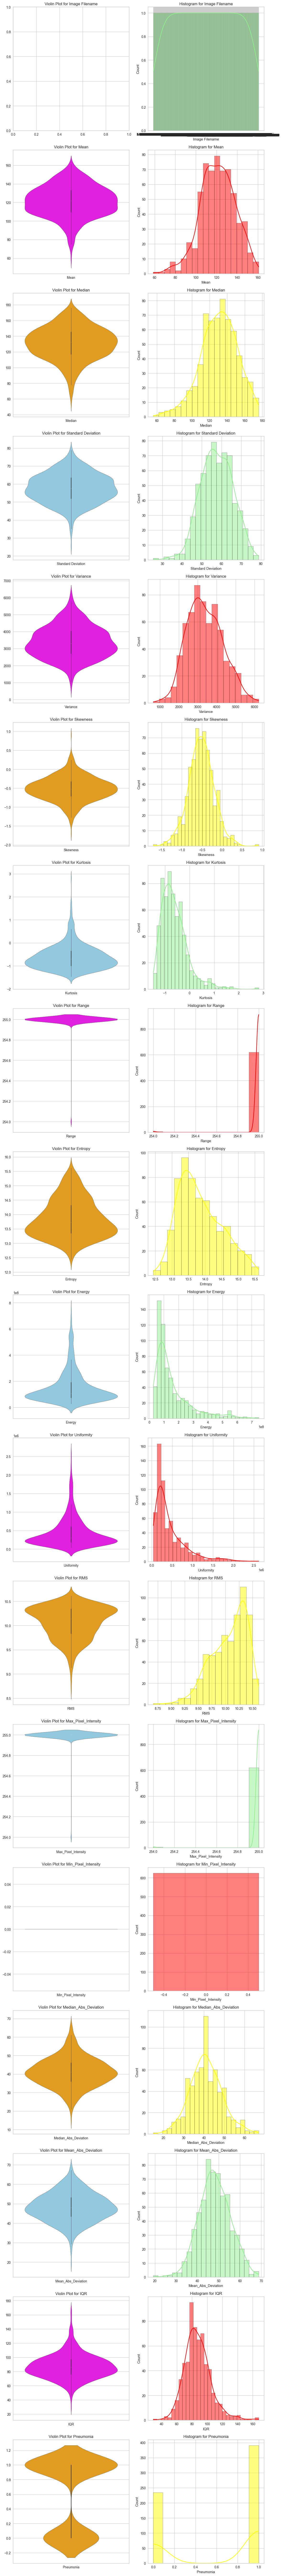

In [10]:
efc.plots_for_all_features(df_test, df_test.columns.tolist())

## Train baseline models with provided dataframes using all the ML algorithms. 
## Execute the required steps to compare multiple models, print classification report and return the best ML model for the passed dataframes.

In [9]:
start_time = time.time()

best_model_for_first_order_features = efc.train_multiple_ml_models(df_train)

end_time = time.time()

# Calculate the total time taken
total_time_seconds = end_time - start_time

# Convert the time to minutes and seconds
total_time_minutes = total_time_seconds // 60
total_time_seconds = total_time_seconds % 60

# Print the results
print(f"\nTotal time to execute: {int(total_time_minutes)} minutes and {total_time_seconds:.2f} seconds")

,Description,Value
0,Session id,123
1,Target,Pneumonia
2,Target type,Binary
3,Original data shape,"(5232, 18)"
4,Transformed data shape,"(5232, 18)"
5,Transformed train set shape,"(3662, 18)"
6,Transformed test set shape,"(1570, 18)"
7,Numeric features,16
8,Categorical features,1
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8364,0.9062,0.9312,0.8602,0.8942,0.5360,0.5451,0.2480
knn,K Neighbors Classifier,0.8151,0.8591,0.8731,0.8773,0.8751,0.5191,0.5195,0.0170
nb,Naive Bayes,0.8149,0.8894,0.9183,0.8459,0.8805,0.4726,0.4815,0.0110
dt,Decision Tree Classifier,0.7422,0.5000,1.0000,0.7422,0.8520,0.0000,0.0000,0.0090
rf,Random Forest Classifier,0.7422,0.8719,1.0000,0.7422,0.8520,0.0000,0.0000,0.0580
ada,Ada Boost Classifier,0.7422,0.5000,1.0000,0.7422,0.8520,0.0000,0.0000,0.0090
gbc,Gradient Boosting Classifier,0.7422,0.5046,1.0000,0.7422,0.8520,0.0000,0.0000,0.0920
lda,Linear Discriminant Analysis,0.7422,0.5000,1.0000,0.7422,0.8520,0.0000,0.0000,0.0090
et,Extra Trees Classifier,0.7422,0.8153,1.0000,0.7422,0.8520,0.0000,0.0000,0.0360
xgboost,Extreme Gradient Boosting,0.7422,0.8800,1.0000,0.7422,0.8520,0.0000,0.0000,0.0490



Total time to execute: 0 minutes and 8.81 seconds


In [10]:
best_model_for_first_order_features

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Trains and evaluate the performance of Logistic Regression using cross validation as well as Hyperparameters. 

In [11]:
logistic_regression = create_model('lr', C=1.0, class_weight=None, dual=False, fit_intercept=True,
                                   intercept_scaling=1, l1_ratio=None, max_iter=1000, 
                                   multi_class='auto', n_jobs=None, penalty='l2', solver='lbfgs', 
                                   random_state=123, tol=0.0001, verbose=True,
                                   warm_start=False)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8011,0.8948,0.9044,0.8396,0.8708,0.4414,0.4472
1,0.8420,0.8991,0.9265,0.8690,0.8968,0.5611,0.5663
2,0.8224,0.8919,0.9301,0.8462,0.8862,0.4865,0.4980
3,0.8361,0.9187,0.9449,0.8510,0.8955,0.5205,0.5361
4,0.8415,0.8956,0.9191,0.8741,0.8961,0.5636,0.5668
5,0.8279,0.9016,0.9412,0.8449,0.8904,0.4945,0.5106
6,0.8197,0.9075,0.9044,0.8601,0.8817,0.5034,0.5062
7,0.8825,0.9293,0.9522,0.8962,0.9234,0.6729,0.6786
8,0.8361,0.9210,0.9446,0.8505,0.8951,0.5248,0.5403


In [12]:
tuned_logistic_regression = tune_model(logistic_regression)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8011,0.8948,0.9044,0.8396,0.8708,0.4414,0.4472
1,0.8420,0.8991,0.9265,0.8690,0.8968,0.5611,0.5663
2,0.8279,0.9002,0.9338,0.8495,0.8897,0.5023,0.5141
3,0.8470,0.9208,0.9338,0.8699,0.9007,0.5692,0.5761
4,0.8415,0.8956,0.9191,0.8741,0.8961,0.5636,0.5668
5,0.8279,0.9016,0.9412,0.8449,0.8904,0.4945,0.5106
6,0.8197,0.9075,0.9044,0.8601,0.8817,0.5034,0.5062
7,0.8825,0.9293,0.9522,0.8962,0.9234,0.6729,0.6786
8,0.8361,0.9210,0.9446,0.8505,0.8951,0.5248,0.5403


Fitting 10 folds for each of 10 candidates, totalling 100 fits


# Analyze the performance of trained and tuned model on holdout set.

## Fetch the Hyperparameters used to finetune the model

In [13]:
# Fetch the hyperparameters used in the tune_model method
hyperparameters = tuned_logistic_regression.get_params()
hyperparameters

{'C': 0.056,
 'class_weight': {},
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 1000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 123,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

## AUC-ROC Curve


AUC-ROC Curve


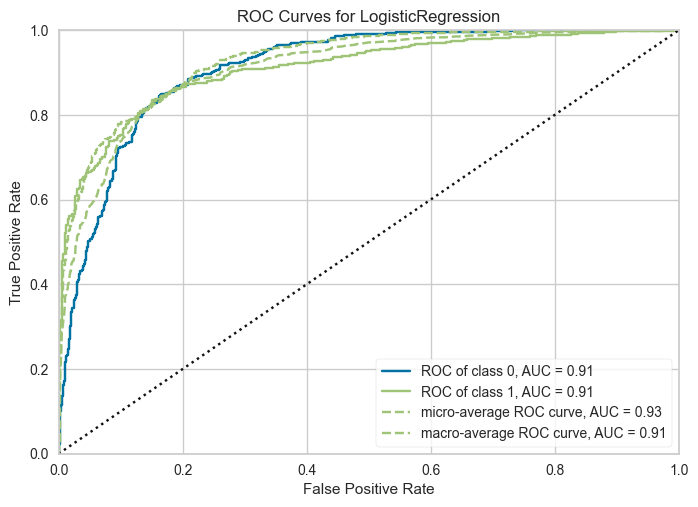

In [14]:
print("\nAUC-ROC Curve")
plot_model(tuned_logistic_regression, plot='auc')

## Confusion Matrix


Confusion Matrix


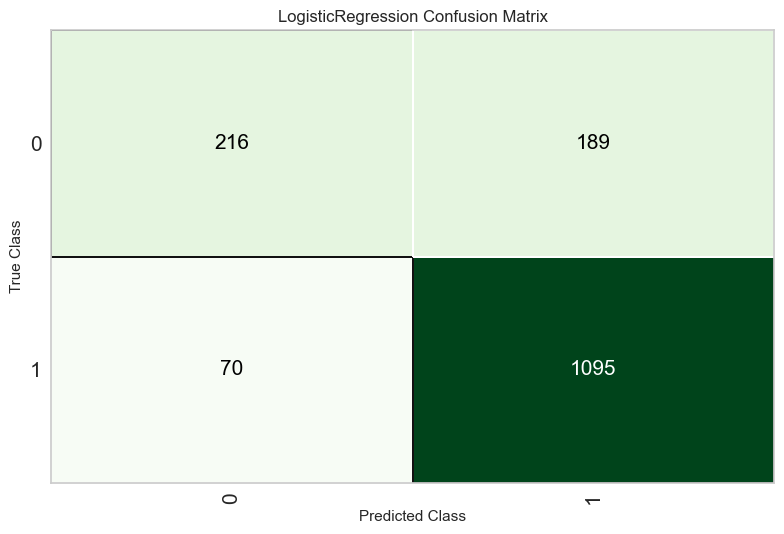

In [15]:
print("\nConfusion Matrix")
plot_model(tuned_logistic_regression, plot='confusion_matrix')

## Precision Recall Curve


Precision Recall Curve


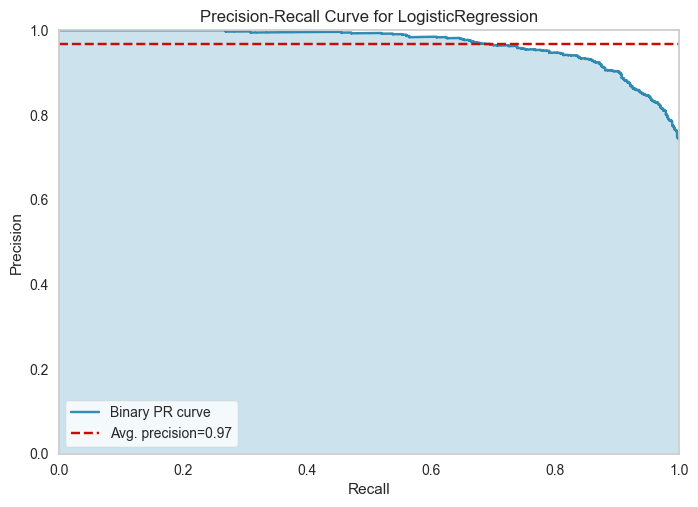

In [16]:
print("\nPrecision Recall Curve")
plot_model(tuned_logistic_regression, plot='pr')

## Decision Boundary



Decision Boundary



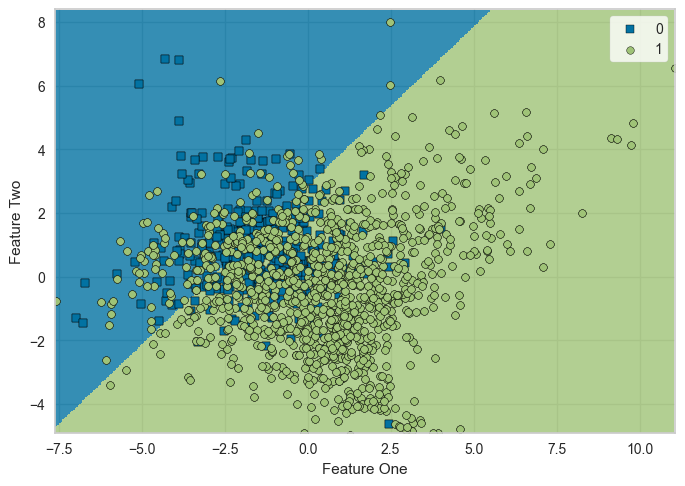

In [17]:
print("\n\nDecision Boundary\n")
plot_model(tuned_logistic_regression, plot='boundary')

## Learning Curve



Learning Curve



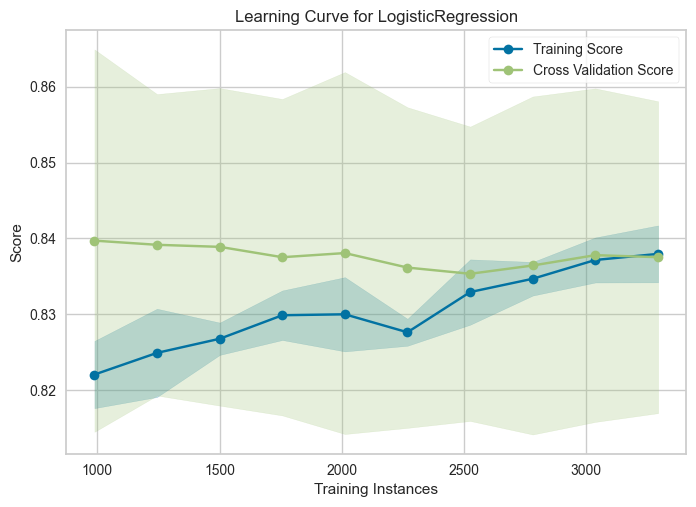

In [18]:
print("\n\nLearning Curve\n")
plot_model(tuned_logistic_regression, plot='learning')

## Feature Importance Plot (the plot that displays the variables that are highly impacting the target variable)

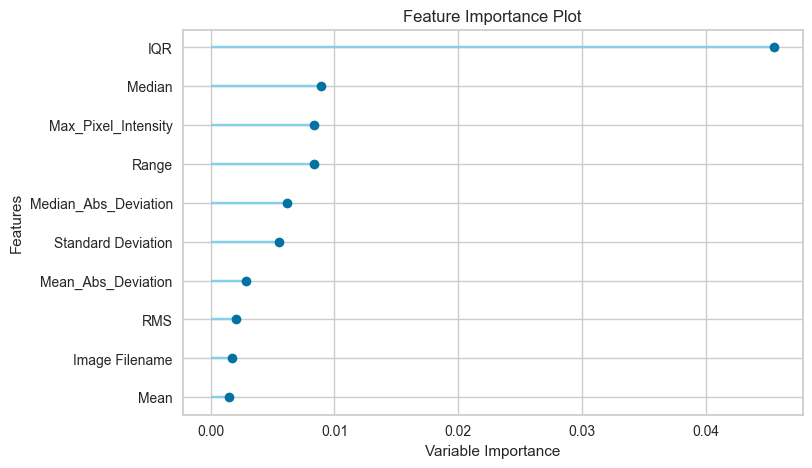

In [19]:
plot_model(tuned_logistic_regression, plot='feature')

## Predict the trained model with holdout set

In [23]:
pred_holdout = predict_model(tuned_logistic_regression, data=df_test)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.8381,0.9348,0.9821,0.8029,0.8835,0.6270,0.6621


In [24]:
model_file_name = 'first_order_features_logistic_regression.pkl'
efc.save_trained_model(final_model, model_file_name)

Model is saved to:  ['/Users/ravkothu/Documents/Personal_items_at_Oracle/Master_Degree/University_of_San_Diego/Online_Masters/MS_in_Applied_AI/Subjects_and_Resources/AAI-501_Introduction_to_AI/AAI-501_Final_Team_Project/pneumonia_detection/trained_models/first_order_features_logistic_regression.pkl']
